In [1]:
import numpy as np

In [2]:
import numpy as np 
from skimage import io
import os
import glob
img_dir = "flat cell videos/electric field/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*tif')
files = glob.glob(data_path)
flat_EFtrain = []
for f1 in files:
    img = io.imread(f1)
    img = np.moveaxis(img,0,-1)
    flat_EFtrain.append(img)
    
img_dir = "flat cell videos/electric field/test" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*tif')
files = glob.glob(data_path)
flat_EFtest = []
for f1 in files:
    img = io.imread(f1)
    img = np.moveaxis(img,0,-1)
    flat_EFtest.append(img)
    
img_dir = "ridged cell videos/electricfield/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*tif')
files = glob.glob(data_path)
ridged_EFtrain = []
for f1 in files:
    img = io.imread(f1)
    img = np.moveaxis(img,0,-1)
    ridged_EFtrain.append(img)
    
img_dir = "ridged cell videos/electricfield/test" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*tif')
files = glob.glob(data_path)
ridged_EFtest = []
for f1 in files:
    img = io.imread(f1)
    img = np.moveaxis(img,0,-1)
    ridged_EFtest.append(img)
    
img_dir = "flat cell videos/nofield" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*tif')
files = glob.glob(data_path)
flat_nofield = []
for f1 in files:
    img = io.imread(f1)
    img = np.moveaxis(img,0,-1)
    flat_nofield.append(img)
    
img_dir = "ridged cell videos/nofield" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*tif')
files = glob.glob(data_path)
ridged_nofield = []
for f1 in files:
    img = io.imread(f1)
    img = np.moveaxis(img,0,-1)
    ridged_nofield.append(img)

In [3]:
EF = flat_EFtrain + flat_EFtest + ridged_EFtrain + ridged_EFtest
NF = flat_nofield + ridged_nofield

In [4]:
len(NF)

17

In [57]:
flat_EF = flat_EFtrain + flat_EFtest 
ridged_EF = ridged_EFtrain + ridged_EFtest
flat_NF = flat_nofield  
ridged_NF = ridged_nofield

In [58]:
flat = flat_EF + flat_nofield
ridged = ridged_EF + ridged_nofield

In [5]:
flat_NF_sparsecode = np.load('flat_wavelet_new.npy', allow_pickle=True)
ridged_NF_sparsecode = np.load('ridged_wavelet_new.npy', allow_pickle=True)
flat_EF_sparsecode = np.load('flat_EF_wavelet.npy', allow_pickle=True)
ridged_EF_sparsecode = np.load('ridged_EF_wavelet.npy', allow_pickle=True)

In [60]:
len(flat)

16

In [7]:
flat_EF_sparsecode[0].shape

(65, 49)

In [8]:
for im in ridged_EF:
    print(im.shape[2])

181
115
131
157
101
171
84
121


In [4]:
EF[0].shape

(512, 512, 65)

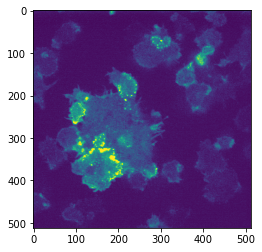

In [12]:
import matplotlib.pyplot as plt

im2 = flat_nofield[0] 
im2 = np.moveaxis(im2,(0,1,2),(1,2,0))
plt.imshow(im2[21])

In [336]:
import numpy as np
import cv2 as cv
import argparse
#parser = argparse.ArgumentParser(description='This sample demonstrates Lucas-Kanade Optical Flow calculation. \
                                              The example file can be downloaded from: \
                                              https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4')
#parser.add_argument('image', type=str, help='path to image file')
#args = parser.parse_args()
#cap = cv.VideoCapture(args.image)
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
#ret, old_frame = cap.read()
#old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
old_gray = im2[21]
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    cv.imshow('frame',img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

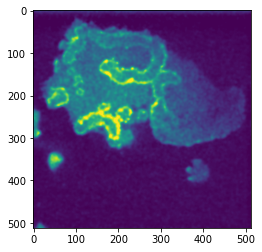

In [5]:
import matplotlib.pyplot as plt

im = NF[2] 
#im2 = flat_nofield[11] 
im = np.moveaxis(im,(0,1,2),(1,2,0))
plt.imshow(im[21])

In [401]:
im[-50:].shape

(50, 512, 512)

In [19]:
im2 = []

j = 0

while j < im.shape[0] - 20:
    im2.append(im[j:j+20])
    j = j+10

im2 = np.stack(im2,axis=0)

In [20]:
im2.shape

(5, 20, 512, 512)

In [263]:
#*****run the code here******#
import numpy as np
import cv2 as cv
vel_NF = [] ##change NF and EF##


for im in NF: ##change NF and EF##
    im = np.moveaxis(im,(0,1,2),(1,2,0))
    vel = []
    im2 = []
    frame_num = 80

    j = 0

    while j < im.shape[0] - frame_num:
        im2.append(im[j:j+frame_num])
        j = j+frame_num
        
    if im.shape[0] >= frame_num:
        im2.append(im[-frame_num:])
        
    if len(im2) > 0:
        im2 = np.stack(im2,axis=0)
    else:
        im2 = np.reshape(im,(1,im.shape[0],512,512))
    
    for l in range(im2.shape[0]):
    # params for ShiTomasi corner detection
        feature_params = dict( maxCorners = 300, qualityLevel = 0.2, minDistance = 7, blockSize = 10 )
        # Parameters for lucas kanade optical flow
        lk_params = dict( winSize  = (30,30), maxLevel = 3, criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
        # Create some random colors
        color = np.random.randint(0,255,(300,3))
        # Take first frame and find corners in it
        #ret, old_frame = cap.read()
        #old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
        old_frame = cv.cvtColor(im2[l][0], cv.COLOR_GRAY2BGR)
        old_gray = im2[l][0]
        p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
        points_initial = p0.reshape(-1,2)
        #frame_gray = im2[22]

        list_images = []

        mask = np.zeros_like(old_frame)
        j = 1
        while j < im2[l].shape[0]:
            frame = cv.cvtColor(im2[l][j], cv.COLOR_GRAY2BGR)
            frame_gray = im2[l][j]
            # calculate optical flow
            p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            # Select good points
            if p1 is not None:
                #good_new = p1[st==1]
                #good_old = p0[st==1]
                good_new = p1.reshape(-1,2)
                good_old = p0.reshape(-1,2)
            # draw the tracks
            for i,(new,old) in enumerate(zip(good_new, good_old)):
                a,b = new.ravel()
                c,d = old.ravel()
                mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
                frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
            img = cv.add(frame,mask)
            list_images.append(img)
            #cv.imshow('frame',img)
            k = cv.waitKey(30) & 0xff
            if k == 27:
                break
            # Now update the previous frame and previous points
            old_gray = frame_gray.copy()
            p0 = good_new.reshape(-1,1,2)
            j = j+1

        points_final = p0.reshape(-1,2)
        num_frames = j-1
        avg_vel = np.mean(points_final - points_initial, axis=0)/num_frames
        vel_norm = np.linalg.norm(avg_vel)
        vel.append(np.append(avg_vel, [vel_norm])) ##change NF and EF##
    vel = np.asarray(vel)
    vel_NF.append(vel)
#p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

In [97]:
len(vel_NF)

47

In [10]:
vel_NF[2].shape

(1, 3)

In [264]:
vel_NF = np.concatenate(vel_NF,axis=0)
vel_EF = np.concatenate(vel_EF,axis=0)

In [242]:
vel_EF.shape

(24, 3)

In [265]:
X = np.concatenate((vel_NF, vel_EF),axis=0)
y = np.concatenate((np.zeros(vel_NF.shape[0]), np.ones(vel_EF.shape[0])), axis=0)

In [280]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [281]:
from sklearn import svm, metrics
from sklearn.svm import LinearSVC

#classifier = LinearSVC(penalty='l1', dual=False, C=1.0, max_iter=10000)
classifier = LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

classifier.score(X_test,y_test)

Classification report for classifier LinearSVC(C=10, max_iter=1000000000):
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.89      0.80      0.84        10

    accuracy                           0.80        15
   macro avg       0.78      0.80      0.78        15
weighted avg       0.81      0.80      0.80        15




0.8

In [153]:
#*****run the code here******#
import numpy as np
import cv2 as cv
code_ridged_NF = [] ##change NF and EF##


for arr in ridged_NF_sparsecode: ##change NF and EF##
    code = []
    frame_num = 60

    j = 0

    while j < arr.shape[0] - frame_num:
        code.append(np.sum(arr[j:j+frame_num],axis=0)/frame_num)
        j = j+frame_num
        
    if arr.shape[0] >= frame_num:
        code.append(np.sum(arr[-frame_num:],axis=0)/frame_num)
        
    if len(code) > 0:
        code = np.stack(code,axis=0)
    else:
        code = np.reshape(np.sum(arr,axis=0)/arr.shape[0],(1,-1))
    
    code = np.asarray(code)
    code_ridged_NF.append(code)
#p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

In [62]:
vel_ridged_EF[0].shape

(4, 3)

In [165]:
feature_ridged_NF = []
for arr1,arr2 in zip(code_ridged_NF,vel_ridged_NF):
    feature_ridged_NF.append(np.concatenate((arr1,arr2),axis=1))

In [167]:
len(feature_ridged_NF)

6

In [60]:
feature_ridged_NF[1].shape

(2, 33)

In [28]:
flat_EF[2].shape

(512, 512, 55)

In [65]:
vel_NF = np.concatenate(vel_NF,axis=0)
vel_EF = np.concatenate(vel_EF,axis=0)

In [21]:
velocity_NF = np.concatenate(vel_NF,axis=0)
velocity_EF = np.concatenate(vel_EF,axis=0)

In [19]:
vel_EF.shape

(12, 3)

In [10]:
velocity_NF = np.load('velocity_NF.npy')

In [80]:
velocity_NF.shape

(112, 3)

In [288]:
# vel_NF_mag = np.linalg.norm(vel_NF, axis=1)
# vel_EF_mag = np.linalg.norm(vel_EF, axis=1)

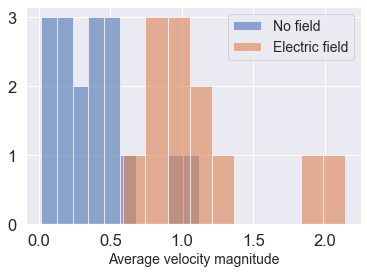

In [55]:
import matplotlib.pyplot as plt

Features=['No field','Electric field']
plt.hist(vel_NF[:,2], alpha=0.6)
plt.hist(vel_EF[:,2], alpha=0.6)
sn.set(font_scale=2.0)
#plt.title('Average velocity magnitude')
plt.legend(Features,loc=1, fontsize=14)
plt.xlabel('Average velocity magnitude',fontsize=14)
plt.savefig("vel_mag.png",bbox_inches='tight', dpi=150)
plt.show()

In [315]:
X = np.concatenate((velocity_NF, velocity_EF),axis=0)
y = np.concatenate((np.zeros(velocity_NF.shape[0]), np.ones(velocity_EF.shape[0])), axis=0)

In [333]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [334]:
y_test.shape

(10,)

In [40]:
np.save('velocity_NF.npy', velocity_NF)
np.save('velocity_EF.npy', velocity_EF)

In [32]:
import random
velocity_NF = random.sample(vel_flat, len(vel_flat))
velocity_EF = random.sample(vel_ridged, len(vel_ridged))

In [33]:
velocity_NF_set1 = np.concatenate(velocity_NF[0:6],axis=0)
velocity_NF_set2 = np.concatenate(velocity_NF[6:12],axis=0)
velocity_NF_set3 = np.concatenate(velocity_NF[12:16],axis=0)
velocity_EF_set1 = np.concatenate(velocity_EF[0:5],axis=0)
velocity_EF_set2 = np.concatenate(velocity_EF[5:10],axis=0)
velocity_EF_set3 = np.concatenate(velocity_EF[10:14],axis=0)

In [34]:
velocity_NF_set1_labels = np.zeros(velocity_NF_set1.shape[0])
velocity_NF_set2_labels = np.zeros(velocity_NF_set2.shape[0])
velocity_NF_set3_labels = np.zeros(velocity_NF_set3.shape[0])
velocity_EF_set1_labels = np.ones(velocity_EF_set1.shape[0])
velocity_EF_set2_labels = np.ones(velocity_EF_set2.shape[0])
velocity_EF_set3_labels = np.ones(velocity_EF_set3.shape[0])

In [45]:
X_test = np.concatenate((velocity_NF_set1,velocity_EF_set1),axis=0)
y_test = np.concatenate((velocity_NF_set1_labels,velocity_EF_set1_labels),axis=0)
X_train = np.concatenate((velocity_NF_set3,velocity_EF_set3,velocity_NF_set2,velocity_EF_set2),axis=0)
y_train = np.concatenate((velocity_NF_set3_labels,velocity_EF_set3_labels,velocity_NF_set2_labels,velocity_EF_set2_labels),axis=0)

In [46]:
from sklearn import svm, metrics
from sklearn.svm import LinearSVC

#classifier = LinearSVC(penalty='l1', dual=False, C=1.0, max_iter=10000)
classifier = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

#print("Classification report for classifier %s:\n%s\n"
#      % (classifier, metrics.classification_report(y_test, predicted)))

classifier.score(X_test,y_test)

0.56

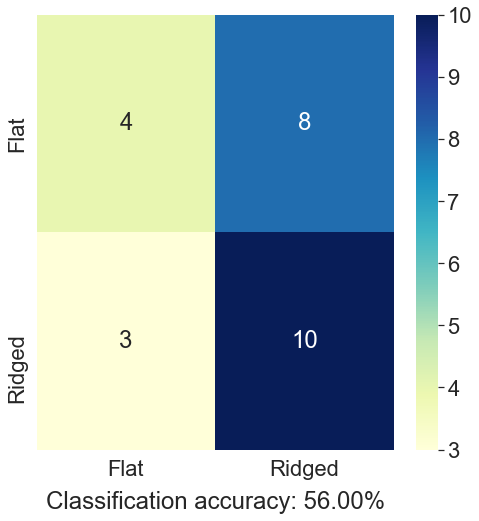

In [47]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

a = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
df_cm = pd.DataFrame(a, range(2), range(2))
plt.figure(figsize=(8,8))
df_cm = df_cm.rename(index={0: "Flat", 1: "Ridged"}, columns={0: "Flat", 1: "Ridged"})
sn.set(font_scale=2.0) # for label size
sn.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt='.0f') # font size
plt.title('Classification accuracy: 56.00%', y = -0.15)
plt.savefig('optflow_classifier_flatridge1.png')
plt.show()

In [282]:
#*****run the code here******#

import numpy as np
import cv2 as cv

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 300, qualityLevel = 0.2, minDistance = 7, blockSize = 10 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (30,30), maxLevel = 3, criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(300,3))
# Take first frame and find corners in it
#ret, old_frame = cap.read()
#old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
old_frame = cv.cvtColor(im2[0][0], cv.COLOR_GRAY2BGR)
old_gray = im2[0][0]
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
points_initial = p0.reshape(-1,2)
#frame_gray = im2[22]

list_images = []

mask = np.zeros_like(old_frame)
j = 1
while j < im2[0].shape[0]:
    frame = cv.cvtColor(im2[0][j], cv.COLOR_GRAY2BGR)
    frame_gray = im2[0][j]
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        #good_new = p1[st==1]
        #good_old = p0[st==1]
        good_new = p1.reshape(-1,2)
        good_old = p0.reshape(-1,2)
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    list_images.append(img)
    #cv.imshow('frame',img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    j = j+1

points_final = p0.reshape(-1,2)
num_frames = j-1
#avg_displacement = np.mean(points_final - points_initial, axis=0)/num_frames
#p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

In [30]:
displacement = points_final - points_initial

In [31]:
points_initial.shape

(190, 2)

In [283]:
avg_displacement = np.mean(points_final - points_initial, axis=0)/num_frames

In [284]:
np.linalg.norm(avg_displacement)

2.2073884

In [285]:
image_seq = np.stack(list_images, axis = 0)

In [286]:
image_seq.shape

(19, 512, 512, 3)

In [287]:
import imageio
imageio.mimwrite("tracking_trial.tiff" , image_seq)

In [282]:
import pandas as pd

xls = pd.ExcelFile('tracking_data.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')
df3 = pd.read_excel(xls, 'Sheet3')
#print (df.values)

In [283]:
accuracy = df3.values[8,0:6]
stdev = df3.values[9,0:6]

In [284]:
accuracy

array([0.7537878787878783, 0.7548076923076918, 0.7499999999999997,
       0.7960526315789471, 0.828125, 0.8416666666666665], dtype=object)

In [287]:
sn.reset_orig()

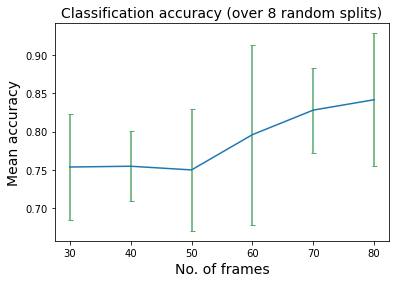

In [288]:
x = [30,40,50,60,70,80]
plt.errorbar(x, accuracy, yerr = stdev, ecolor='g', capsize=2.5)
#plt.plot(x,accuracy)
plt.ylabel('Mean accuracy',fontsize=14)
plt.xlabel('No. of frames',fontsize=14)
plt.title('Classification accuracy (over 8 random splits)',fontsize=14)
plt.savefig('classification_accuracy.png',bbox_inches='tight', dpi=150)

Text(0.5, 1.0, 'Classification accuracy Stdev.')

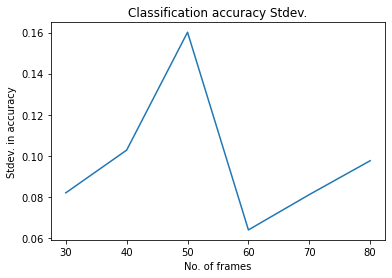

In [336]:
x = [30,40,50,60,70,80]
plt.plot(x,stdev)
plt.ylabel('Stdev. in accuracy')
plt.xlabel('No. of frames')
plt.title('Classification accuracy Stdev.')

Text(0.5, 1.0, 'Mean - Stdev.')

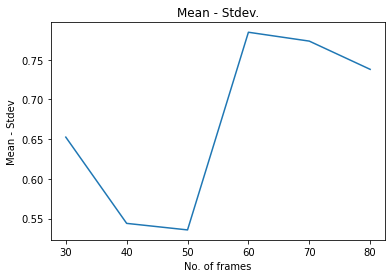

In [338]:
x = [30,40,50,60,70,80]
plt.plot(x,accuracy - stdev)
plt.ylabel('Mean - Stdev')
plt.xlabel('No. of frames')
plt.title('Mean - Stdev.')

In [3]:
vel = df1.values[0:31,0:3]

In [81]:
df1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,-0.340,0.24,0.416173,flat_NF
1,0.150,-0.07,0.165529,flat_NF
2,-0.770,0.82,1.124856,flat_NF
3,-0.540,-0.13,0.555428,flat_NF
4,0.270,-0.04,0.272947,flat_NF
5,-0.200,-0.03,0.202237,flat_NF
6,0.920,-0.14,0.930591,flat_NF
7,0.120,0.25,0.277308,flat_NF
8,0.400,0.06,0.404475,flat_NF
9,-0.360,0.16,0.393954,flat_NF


In [4]:
vel

array([[-0.34, 0.24, 0.4161730409336963],
       [0.15, -0.07, 0.16552945357246848],
       [-0.77, 0.82, 1.124855546281388],
       [-0.54, -0.13, 0.5554277630799527],
       [0.27, -0.04, 0.27294688127912364],
       [-0.2, -0.03, 0.20223748416156687],
       [0.92, -0.14, 0.9305912099305473],
       [0.12, 0.25, 0.27730849247724093],
       [0.4, 0.06, 0.40447496832313373],
       [-0.36, 0.16, 0.39395431207184417],
       [-0.2, -0.42, 0.46518813398452025],
       [-0.1, -0.1, 0.14142135623730953],
       [1.9, 0.47, 1.957268504830137],
       [-2.06, -0.61, 2.1484180226389835],
       [0.82, 0.03, 0.8205485969764374],
       [0.95, -0.26, 0.9849365461794988],
       [-0.011, 0.04, 0.041484937025383084],
       [0.005, 0.37, 0.37003378224156774],
       [-0.01, -0.01, 0.01414213562373095],
       [0.11, -0.01, 0.11045361017187261],
       [0.31, 0.59, 0.6664833081180653],
       [-0.51, -0.06, 0.5135172830587107],
       [1.11, -0.09, 1.1136426715962353],
       [-1.006, -0.09, 1.0

In [28]:
vel_NF = np.concatenate((vel[0:12,:], vel[16:22,:]), axis=0)
vel_EF = np.concatenate((vel[12:16,:], vel[22:30,:]), axis=0)

In [5]:
vel_flat = vel[0:16,:]
vel_ridged = vel[16:31,:]

In [141]:
vel_ridged

array([[-0.011, 0.04, 0.041484937025383084],
       [0.005, 0.37, 0.37003378224156774],
       [-0.01, -0.01, 0.01414213562373095],
       [0.11, -0.01, 0.11045361017187261],
       [0.31, 0.59, 0.6664833081180653],
       [-0.51, -0.06, 0.5135172830587107],
       [1.11, -0.09, 1.1136426715962353],
       [-1.006, -0.09, 1.0100178216249454],
       [0.82, -0.04, 0.8209750300709516],
       [-0.8, -0.1, 0.806225774829855],
       [-1.2, 0.25, 1.2257650672131262],
       [0.58, -0.09, 0.5869412236331675],
       [0.98, 0.1, 0.9850888284819801],
       [-1.19, 0.09, 1.1933985084622822]], dtype=object)

In [66]:
X = np.concatenate((vel_NF, vel_EF),axis=0)
y = np.concatenate((np.zeros(vel_NF.shape[0]), np.ones(vel_EF.shape[0])), axis=0)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [82]:
len(y_test)

10

In [83]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1.])

In [70]:
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.svm import LinearSVC

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 1e2, 1e3, 5e3, 1e4, 5e4, 1e5]}               
clf = GridSearchCV(
    LinearSVC(class_weight=None, dual=True, max_iter=1000000000, penalty='l2'), param_grid
)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 27.173s
Best estimator found by grid search:
LinearSVC(C=10, max_iter=1000000000)


In [84]:
from sklearn import svm, metrics
from sklearn.svm import LinearSVC

#classifier = LinearSVC(penalty='l1', dual=False, C=1.0, max_iter=10000)
classifier = LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

classifier.score(X_test,y_test)

Classification report for classifier LinearSVC(C=10, max_iter=1000000000):
              precision    recall  f1-score   support

         0.0       0.38      0.60      0.46         5
         1.0       0.00      0.00      0.00         5

    accuracy                           0.30        10
   macro avg       0.19      0.30      0.23        10
weighted avg       0.19      0.30      0.23        10




0.3

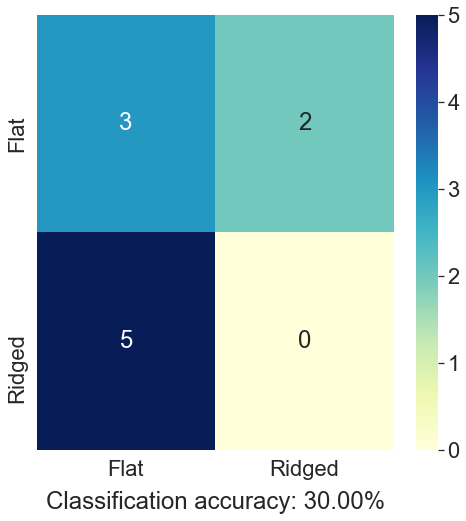

In [86]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

a = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
df_cm = pd.DataFrame(a, range(2), range(2))
plt.figure(figsize=(8,8))
df_cm = df_cm.rename(index={0: "Flat", 1: "Ridged"}, columns={0: "Flat", 1: "Ridged"})
sn.set(font_scale=2.0) # for label size
sn.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt='.0f') # font size
plt.title('Classification accuracy: 30.00%', y = -0.15)
plt.savefig('optflow_classifier_flatridge3.png',bbox_inches='tight', dpi=150)
plt.show()

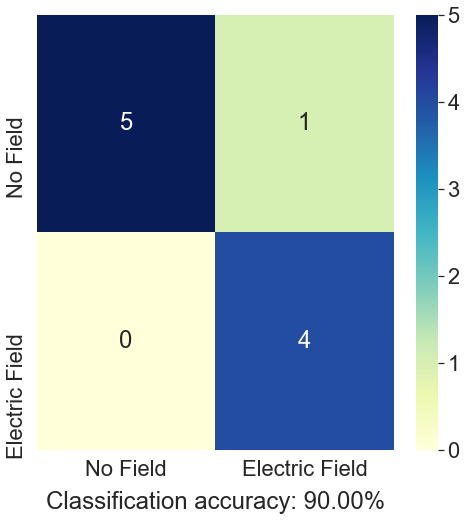

In [48]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

a = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
df_cm = pd.DataFrame(a, range(2), range(2))
plt.figure(figsize=(8,8))
df_cm = df_cm.rename(index={0: "No Field", 1: "Electric Field"}, columns={0: "No Field", 1: "Electric Field"})
sn.set(font_scale=2.0) # for label size
sn.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt='.0f') # font size
plt.title('Classification accuracy: 90.00%', y = -0.15)
plt.savefig('optflow_classifier3.png',bbox_inches='tight', dpi=150)
plt.show()

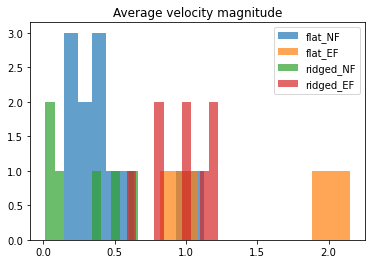

In [344]:
import matplotlib.pyplot as plt

Features=['flat_NF','flat_EF','ridged_NF','ridged_EF']
plt.hist(vel[0:12], alpha=0.7)
plt.hist(vel[12:16], alpha=0.7)
plt.hist(vel[16:22], alpha=0.7)
plt.hist(vel[22:30], alpha=0.7)
plt.title('Average velocity magnitude')
plt.legend(Features,loc=1)
#plt.savefig("figure12.png")
plt.show()

In [181]:
import numpy as np
import cv2 as cv

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100, qualityLevel = 0.3, minDistance = 7, blockSize = 10 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (30,30), maxLevel = 3, criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
#ret, old_frame = cap.read()
#old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
old_frame = cv.cvtColor(im2[0], cv.COLOR_GRAY2BGR)
old_gray = im2[0]
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

In [186]:
p1[0]

array([[319.1984 , 245.80608]], dtype=float32)

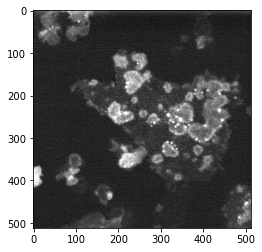

In [183]:
plt.imshow(old_frame)

In [184]:
frame = cv.cvtColor(im2[1], cv.COLOR_GRAY2BGR)
frame_gray = im2[1]
# calculate optical flow
p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

In [14]:
color = np.random.randint(0,255,(100,3))
#color = (0, 0, 255)

for i,new in enumerate(p1):
    a,b = new.ravel()
    #mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
    frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)

In [16]:
color[1]

array([ 11, 241, 105])

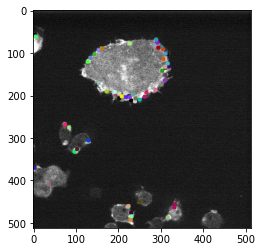

In [17]:
plt.imshow(frame)

In [18]:
frame.shape

(512, 512, 3)

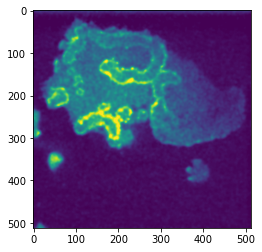

In [92]:
import matplotlib.pyplot as plt

im2 = flat_nofield[2] 
im2 = np.moveaxis(im2,(0,1,2),(1,2,0))
plt.imshow(im2[21])

In [58]:
im2.shape

(61, 512, 512)

In [20]:
import numpy as np
import cv2 as cv

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 1000, qualityLevel = 0.3, minDistance = 7, blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (30,30), maxLevel = 2, criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
#ret, old_frame = cap.read()
#old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
old_frame = im2[0]
old_gray = im2[0]
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
#frame_gray = im2[22]

mask = np.zeros_like(old_frame)
j = 1
while j < im2.shape[0]:
    frame = im2[j]
    frame_gray = im2[j]
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    cv.imshow('frame',img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    j = j+1

#p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)